In [11]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

In [9]:
# create a conv2d class instance with parameters

#parameters
inChans = 3
outChans = 15
krnSize = 5
stride = 1
padding = 0

# create the instance
c = nn.Conv2d(inChans, outChans, krnSize, stride, padding)

print(c), print('')
print('Size of weights: ' + str(c.weight.shape))
print('Size of bias: ' + str(c.bias.shape))
print(c.weight[0], c.weight[1])

Conv2d(3, 15, kernel_size=(5, 5), stride=(1, 1))

Size of weights: torch.Size([15, 3, 5, 5])
Size of bias: torch.Size([15])
tensor([[[ 0.0308,  0.0288, -0.0948, -0.0069, -0.0903],
         [-0.0139, -0.1010,  0.0854, -0.0984,  0.0093],
         [ 0.0232,  0.0542, -0.0329, -0.1098, -0.0570],
         [ 0.0951,  0.1043,  0.0918,  0.0199, -0.0989],
         [ 0.1002, -0.0524, -0.0005, -0.0195,  0.0758]],

        [[ 0.0822,  0.0805, -0.0793,  0.0929, -0.0834],
         [ 0.1048, -0.0951,  0.0364,  0.0529,  0.0354],
         [-0.0400,  0.0814, -0.0371,  0.0312, -0.1088],
         [-0.0606, -0.1151, -0.0618,  0.0800,  0.1077],
         [ 0.1009,  0.0708,  0.0008,  0.0294, -0.0980]],

        [[ 0.1031, -0.0132, -0.0096,  0.0665, -0.0005],
         [ 0.0469, -0.0055,  0.0477,  0.1114,  0.0345],
         [ 0.1108, -0.1073, -0.0205,  0.0800,  0.0512],
         [ 0.0819, -0.0206,  0.0314, -0.0499, -0.0820],
         [ 0.0700,  0.0794,  0.0918,  0.0364,  0.0218]]],
       grad_fn=<SelectBackward

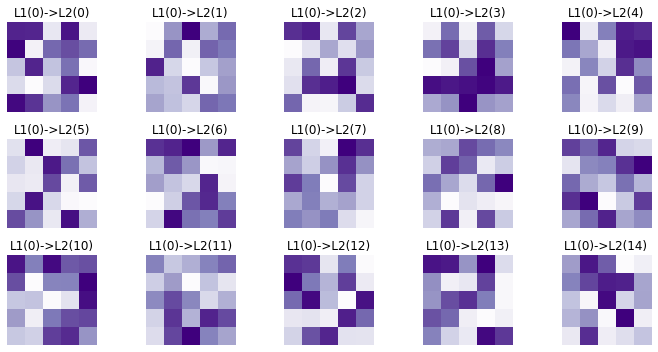

In [13]:
fig, axs = plt.subplots(3, 5, figsize = (10, 5))
for i, ax in enumerate(axs.flatten()):
  ax.imshow(torch.squeeze(c.weight[i, 1, : , :]).detach(), cmap = 'Purples')
  ax.set_title('L1(0)->L2(%s)'%i)
  ax.axis('off')

plt.tight_layout()
plt.show()

torch.Size([1, 3, 64, 64])
(64, 64, 3, 1)


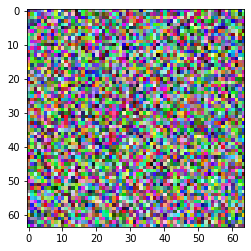

In [17]:
imgsize = (1, 3, 64, 64)
img = torch.rand(imgsize)

img2view = img.permute(2, 3, 1, 0).numpy()
print(img.shape)
print(img2view.shape)

plt.imshow(np.squeeze(img2view))

In [18]:
convRes = c(img)
print(img.shape)
print(convRes.shape)

torch.Size([1, 3, 64, 64])
torch.Size([1, 15, 60, 60])


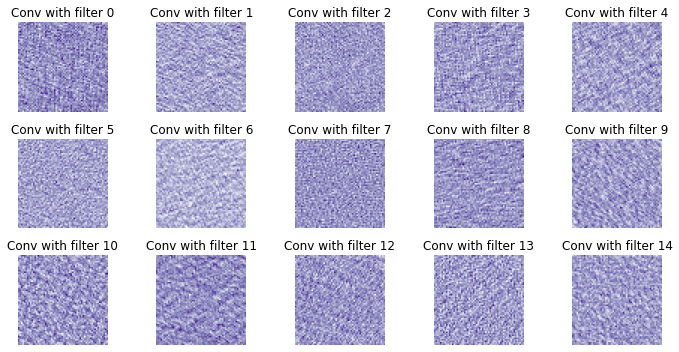

In [23]:
fig, axs = plt.subplots(3, 5, figsize = (10, 5))
for i, ax in enumerate(axs.flatten()):
  I = torch.squeeze(convRes[0, i, :, :]).detach()
  ax.imshow(I, cmap = 'Purples')
  ax.set_title('Conv with filter %s'%i)
  ax.axis('off')

plt.tight_layout()
plt.show()

In [28]:
# create a conv2d transpose class instance with parameters

#parameters
inChans = 3
outChans = 15
krnSize = 5
stride = 1
padding = 0

# create the instance
c = nn.ConvTranspose2d(inChans, outChans, krnSize, stride, padding)

print(c), print('')
print('Size of weights: ' + str(c.weight.shape))
print('Size of bias: ' + str(c.bias.shape))

ConvTranspose2d(3, 15, kernel_size=(5, 5), stride=(1, 1))

Size of weights: torch.Size([3, 15, 5, 5])
Size of bias: torch.Size([15])


In [29]:
convRes = c(img)
print(img.shape)
print(convRes.shape)

torch.Size([1, 3, 64, 64])
torch.Size([1, 15, 68, 68])
